In [4]:
import numpy as np
import pandas as pd
import networkx as nx

import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
ensayo3_excel = r"C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_03.xlsx"
ensayo4_excel = r"C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S03_datasets\eeg-motor-movementimagery_Ensayo_04.xlsx"
coordenadas_csv = r"C:\Users\HP\Documents\GitHub\Neurociencias-2026-1\S03_datasets\MI_coordinates.xlsx"

ensayo3_dict= pd.read_excel(ensayo3_excel, sheet_name=None, index_col=0)
ensayo4_dict= pd.read_excel(ensayo4_excel, sheet_name=None, index_col=0)

In [13]:
ensayo3_dict.keys()

for llave in ensayo3_dict.keys():
    print(llave)

Sujeto1
Sujeto2
Sujeto3
Sujeto4
Sujeto5
Sujeto6
Sujeto7
Sujeto8
Sujeto9
Sujeto10
Sujeto11
Sujeto12
Sujeto13
Sujeto14
Sujeto15
Sujeto16
Sujeto17
Sujeto18
Sujeto19
Sujeto20
Sujeto21
Sujeto22
Sujeto23
Sujeto24
Sujeto25
Sujeto26
Sujeto27
Sujeto28
Sujeto29
Sujeto30
Sujeto31
Sujeto32
Sujeto33
Sujeto34
Sujeto35
Sujeto36
Sujeto37
Sujeto38
Sujeto39
Sujeto40
Sujeto41
Sujeto42
Sujeto43
Sujeto44
Sujeto45
Sujeto46
Sujeto47
Sujeto48
Sujeto49
Sujeto50
Sujeto51
Sujeto52
Sujeto53
Sujeto54
Sujeto55
Sujeto56
Sujeto57
Sujeto58
Sujeto59
Sujeto60
Sujeto61
Sujeto62
Sujeto63
Sujeto64
Sujeto65
Sujeto66
Sujeto67
Sujeto68
Sujeto69
Sujeto70
Sujeto71
Sujeto72
Sujeto73
Sujeto74
Sujeto75
Sujeto76
Sujeto77
Sujeto78
Sujeto79
Sujeto80
Sujeto81
Sujeto82
Sujeto83
Sujeto84
Sujeto85
Sujeto86
Sujeto87
Sujeto88
Sujeto89
Sujeto90
Sujeto91
Sujeto92
Sujeto93
Sujeto94
Sujeto95
Sujeto96
Sujeto97
Sujeto98
Sujeto99
Sujeto100
Sujeto101
Sujeto102
Sujeto103
Sujeto104
Sujeto105
Sujeto106
Sujeto107
Sujeto108
Sujeto109


In [14]:
ensayos_dfs =[]
for sujeto in ensayo3_dict.keys():
    ensayos_dfs.append(ensayo3_dict[sujeto])

In [ ]:
###Filtrado de matrices

In [26]:
threshold= 0.5
porcentaje = 0.6
##conjuntamos las matrices
stack = np.stack([df.values for df in ensayos_dfs])
##aplicamos filtro a cada matiz
above =stack > threshold

N = len(ensayos_dfs)
count_above = above.sum(axis=0) ###contando cunatos valores superan el umbral en celda

###Calcular el minimo requerido
min_requerido= int(np.ceil(porcentaje*N)) ###Con esto bastara con quedarnos con las celdas de 'above', que cumplan con min_requerido para asi 
## tener el número de sujetos qeu superan el umbral
result_bool = count_above >= min_requerido

result_df = pd.DataFrame(result_bool,
                         index = ensayos_dfs[0].index,
                         columns=ensayos_dfs[0].columns).astype(int)


<Axes: >

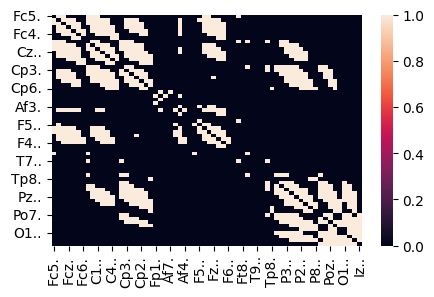

In [27]:
plt.figure(figsize=(5,3))

sns.heatmap(result_df)

In [16]:
stack.shape

(109, 64, 64)

In [28]:
###generar estadisticos para decidir umbrales

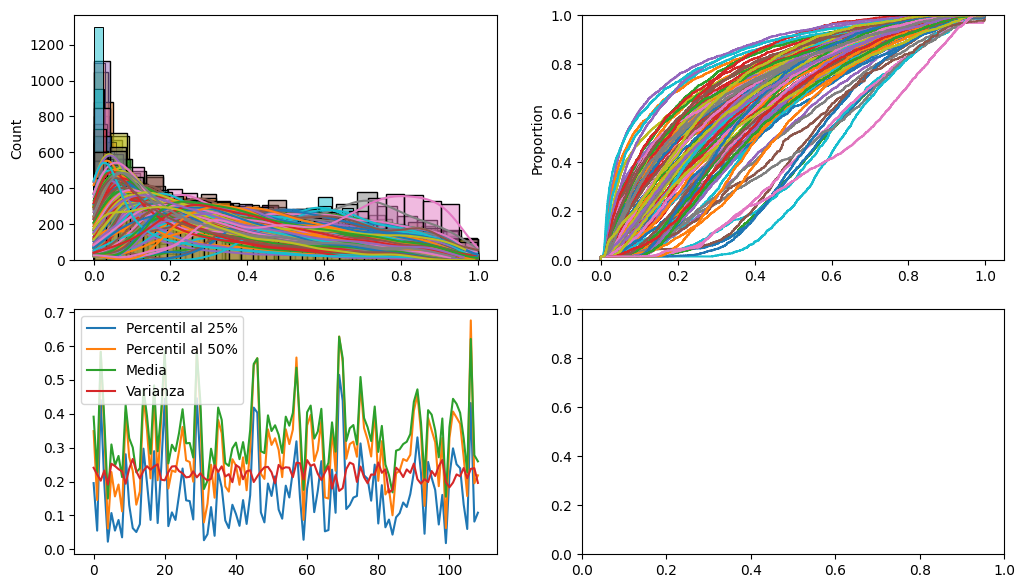

In [33]:
ensayos_dfs
th25, th50, th75, promedio, varianza = [], [], [], [], []

fig, axes = plt.subplots(2, 2, figsize=(12, 7))
for sujeto in ensayos_dfs:
    ###CAlculo de estadisticos
    data = sujeto.stack().values
    th25.append(np.percentile(data, 25))
    th50.append(np.percentile(data, 50))
    th75.append(np.percentile(data, 75))
    promedio.append(np.mean(data))
    varianza.append(np.std(data))
    ###plots
    sns.histplot(sujeto.stack().values, ax=axes[0][0], kde=True)
    sns.ecdfplot(sujeto.stack().values, ax=axes[0][1])
axes[1][0].plot(th25, label="Percentil al 25%")
axes[1][0].plot(th50, label="Percentil al 50%")
axes[1][0].plot(promedio, label="Media")
axes[1][0].plot(varianza, label="Varianza")
axes[1][0].legend()